### 초기 시작

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier, XGBRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

print(os.getcwd())
os.chdir('c:/Users/kustat/Desktop/홍스프/')
print(os.getcwd())

c:\Users\kustat\Desktop\홍스프
c:\Users\kustat\Desktop\홍스프


In [ ]:
# 데이터 불러오기
data = pd.read_csv("raw.csv", encoding="cp949")

In [ ]:
data['INDUSTRY_CD_label'] = data['INDUSTRY_CD'].str[1:].astype('int')

In [ ]:
train = data[(data['train']==1)&(data['DATA_CRTR_YM']<=202210)].reset_index()
valid = data[(data['train']==1)&(data['DATA_CRTR_YM']<=202212)&(data['DATA_CRTR_YM']>=202211)].reset_index()
test = data[data['train']==0].reset_index()

### 업종별로 나눈 데이터 생성하기

In [ ]:
train8 = train[train['INDUSTRY_CD_label'] == 8]
train9 = train[train['INDUSTRY_CD_label'] == 9]
train10 = train[train['INDUSTRY_CD_label'] == 10]
train11 = train[train['INDUSTRY_CD_label'] == 11]

valid8 = valid[valid['INDUSTRY_CD_label'] == 8]
valid9 = valid[valid['INDUSTRY_CD_label'] == 9]
valid10 = valid[valid['INDUSTRY_CD_label'] == 10]
valid11 = valid[valid['INDUSTRY_CD_label'] == 11]

test8 = test[test['INDUSTRY_CD_label'] == 8]
test9 = test[test['INDUSTRY_CD_label'] == 9]
test10 = test[test['INDUSTRY_CD_label'] == 10]
test11 = test[test['INDUSTRY_CD_label'] == 11]

In [ ]:
columns = ['전체점포수','프랜차이즈점포수', '일반점포수', '길단위유동인구', '주거인구', '직장인구', '개업수', '폐업수', '개업률', '폐업률',
           '전체 임대료','1층 임대료', '1층 외 임대료', '생활물가지수', '부동산거래대비유동인구', '공실률대비매매가임대료', '젠트리피케이션',
           '지하철개수', '스타벅스개수', '65세이상', '65세이상_남', '65세이상_여', '출근시간_승차수', '출근시간_하차수', '주말_하차수']

In [ ]:
X_train8 = train8[columns]
X_train9 = train9[columns]
X_train10 = train10[columns]
X_train11 = train11[columns]

y_train8 = train8['SLS_GRD']
y_train9 = train9['SLS_GRD']
y_train10 = train10['SLS_GRD']
y_train11 = train11['SLS_GRD']

In [ ]:
X_valid8 = valid8[columns]
X_valid9 = valid9[columns]
X_valid10 = valid10[columns]
X_valid11 = valid11[columns]

y_valid8 = valid8['SLS_GRD']
y_valid9 = valid9['SLS_GRD']
y_valid10 = valid10['SLS_GRD']
y_valid11 = valid11['SLS_GRD']

In [ ]:
X_test8 = test8[columns]
X_test9 = test9[columns]
X_test10 = test10[columns]
X_test11 = test11[columns]

스케일링

In [ ]:
features_to_scale = X_train8.columns
scaler8 = StandardScaler()
scaler8.fit(X_train8[features_to_scale])
X_train8[features_to_scale] = scaler8.transform(X_train8[features_to_scale])
X_valid8[features_to_scale] = scaler8.transform(X_valid8[features_to_scale])
X_test8[features_to_scale] = scaler8.transform(X_test8[features_to_scale])

In [ ]:
scaler9 = StandardScaler()
scaler9.fit(X_train9[features_to_scale])
X_train9[features_to_scale] = scaler9.transform(X_train9[features_to_scale])
X_valid9[features_to_scale] = scaler9.transform(X_valid9[features_to_scale])
X_test9[features_to_scale] = scaler9.transform(X_test9[features_to_scale])

In [ ]:
scaler10 = StandardScaler()
scaler10.fit(X_train10[features_to_scale])
X_train10[features_to_scale] = scaler10.transform(X_train10[features_to_scale])
X_valid10[features_to_scale] = scaler10.transform(X_valid10[features_to_scale])
X_test10[features_to_scale] = scaler10.transform(X_test10[features_to_scale])

In [ ]:
scaler11 = StandardScaler()
scaler11.fit(X_train11[features_to_scale])
X_train11[features_to_scale] = scaler11.transform(X_train11[features_to_scale])
X_valid11[features_to_scale] = scaler11.transform(X_valid11[features_to_scale])
X_test11[features_to_scale] = scaler11.transform(X_test11[features_to_scale])

In [ ]:
X_train8['대학교여부'] = train8['대학교여부']
X_valid8['대학교여부'] = valid8['대학교여부']
X_test8['대학교여부'] = test8['대학교여부']

X_train9['대학교여부'] = train9['대학교여부']
X_valid9['대학교여부'] = valid9['대학교여부']
X_test9['대학교여부'] = test9['대학교여부']

X_train10['대학교여부'] = train10['대학교여부']
X_valid10['대학교여부'] = valid10['대학교여부']
X_test10['대학교여부'] = test10['대학교여부']

X_train11['대학교여부'] = train11['대학교여부']
X_valid11['대학교여부'] = valid11['대학교여부']
X_test11['대학교여부'] = test11['대학교여부']

In [ ]:
train_df8 = pd.concat([X_train8, y_train8], axis = 1)
valid_df8 = pd.concat([X_valid8, y_valid8], axis = 1)

train_df9 = pd.concat([X_train9, y_train9], axis = 1)
valid_df9 = pd.concat([X_valid9, y_valid9], axis = 1)

train_df10 = pd.concat([X_train10, y_train10], axis = 1)
valid_df10 = pd.concat([X_valid10, y_valid10], axis = 1)

train_df11 = pd.concat([X_train11, y_train11], axis = 1)
valid_df11 = pd.concat([X_valid11, y_valid11], axis = 1)

### [A08] regression

null model

In [ ]:
etr8_reg = ExtraTreesRegressor(random_state=0)
etr8_reg.fit(X_train8, y_train8)
pred_train8 = etr8_reg.predict(X_train8)
pred_val8 = etr8_reg.predict(X_valid8)

pred_train8 = round(pd.DataFrame(pred_train8))
pred_val8 = round(pd.DataFrame(pred_val8))

print('MSE of train8_reg:', mean_squared_error(y_train8, pred_train8))
print('MSE of valid8_reg:', mean_squared_error(y_valid8, pred_val8))

MSE of train8_reg: 0.009391371012394054
MSE of valid8_reg: 0.39438085327783556


In [ ]:
#상관계수 확인
cols = X_train8.columns
corr8 = X_train8.corr()
for i in range(len(cols)) :
  for j in range(len(cols)) :
    if i > j and corr8.iloc[i, j] > 0.9 :
      print(cols[i], cols[j], corr8.iloc[i, j])

일반점포수 전체점포수 0.987050144972155
개업수 일반점포수 0.9107169486928015
1층 임대료 전체 임대료 0.928159570436962
1층 외 임대료 전체 임대료 0.9072671344214377
65세이상_남 65세이상 0.9930597624820283
65세이상_여 65세이상 0.9957559145027765
65세이상_여 65세이상_남 0.978020999390672


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/H2GTRM.TTF'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

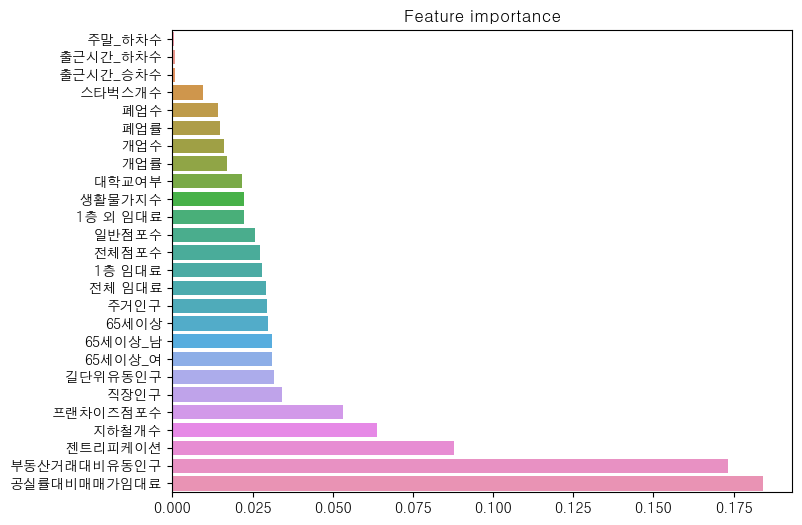

In [ ]:
#변수 중요도 확인
ser8 = pd.Series(etr8_reg.feature_importances_, index=X_train8.columns)
ser8.sort_values(inplace=True)

plt.figure(figsize=(8,6))
plt.title('Feature importance')
sns.barplot(x = ser8, y = ser8.index)
plt.show()


In [ ]:
#상관계수 & 중요도 기준으로 변수선택
X_train8_1 = X_train8.drop(columns=['일반점포수', '65세이상_남', '65세이상_여'], axis = 1)
X_valid8_1 = X_valid8.drop(columns=['일반점포수', '65세이상_남', '65세이상_여'], axis = 1)
X_test8_1 = X_test8.drop(columns=['일반점포수', '65세이상_남', '65세이상_여'], axis = 1)

변수 선택 후 model

In [ ]:
etr8_1_reg = ExtraTreesRegressor(random_state=0)
etr8_1_reg.fit(X_train8_1, y_train8)
pred_train8_1 = etr8_1_reg.predict(X_train8_1)
pred_val8_1 = etr8_1_reg.predict(X_valid8_1)

pred_train8_1 = round(pd.DataFrame(pred_train8_1))
pred_val8_1 = round(pd.DataFrame(pred_val8_1))

print('MSE of train8_1_reg:', mean_squared_error(y_train8, pred_train8_1))
print('MSE of valid8_1_reg:', mean_squared_error(y_valid8, pred_val8_1))

MSE of train8_1_reg: 0.009391371012394054
MSE of valid8_1_reg: 0.39835398732381044


### [A09] Regression

In [ ]:
etr9_reg = ExtraTreesRegressor(random_state=0)
etr9_reg.fit(X_train9, y_train9)
pred_train9 = etr9_reg.predict(X_train9)
pred_val9 = etr9_reg.predict(X_valid9)

pred_train9 = round(pd.DataFrame(pred_train9))
pred_val9 = round(pd.DataFrame(pred_val9))

print('MSE of train9_reg:', mean_squared_error(y_train9, pred_train9))
print('MSE of valid9_reg:', mean_squared_error(y_valid9, pred_val9))

Accuracy of train9_reg: 0.9916199849777249
Accuracy of valid9_reg: 0.7147195698526003
MSE of train9_reg: 0.027867965367965368
MSE of valid9_reg: 0.5336927223719676


In [ ]:
#상관계수 확인
cols = X_train9.columns
corr9 = X_train9.corr()
for i in range(len(cols)) :
  for j in range(len(cols)) :
    if i > j and corr9.iloc[i, j] > 0.9 :
      print(cols[i], cols[j], corr9.iloc[i, j])

프랜차이즈점포수 전체점포수 0.9119817148067038
일반점포수 전체점포수 0.9892657669743133
1층 임대료 전체 임대료 0.9228584147565753
65세이상_남 65세이상 0.9915368824277295
65세이상_여 65세이상 0.9950036739414526
65세이상_여 65세이상_남 0.9736213009910333
출근시간_하차수 출근시간_승차수 0.9993674100137823
주말_하차수 출근시간_승차수 0.990586478076013
주말_하차수 출근시간_하차수 0.9900423834007017


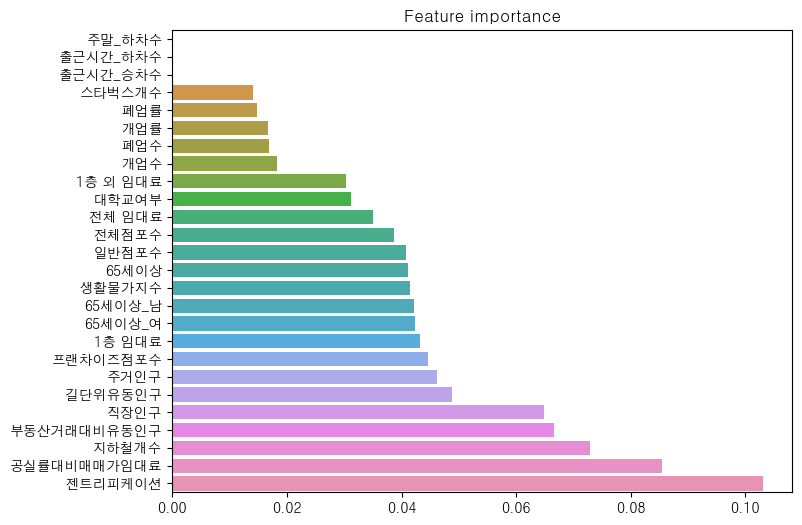

In [ ]:
#변수 중요도 확인
ser9 = pd.Series(etr9_reg.feature_importances_, index=X_train9.columns)
ser9.sort_values(inplace=True)

plt.figure(figsize=(8,6))
plt.title('Feature importance')
sns.barplot(x = ser9, y = ser9.index)
plt.show()


In [ ]:
#상관계수 & 중요도 기준으로 변수선택
X_train9_1 = X_train9.drop(columns=['주말_하차수', '출근시간_승차수', '65세이상_남','65세이상_여', '일반점포수'], axis = 1)
X_valid9_1 = X_valid9.drop(columns=['주말_하차수', '출근시간_승차수', '65세이상_남','65세이상_여', '일반점포수'], axis = 1)
X_test9_1 = X_test9.drop(columns=['주말_하차수', '출근시간_승차수', '65세이상_남','65세이상_여', '일반점포수'], axis = 1)

변수 선택 후 model

In [ ]:
etr9_1_reg = ExtraTreesRegressor(random_state=0)
etr9_1_reg.fit(X_train9_1, y_train9)
pred_train9_1 = etr9_1_reg.predict(X_train9_1)
pred_val9_1 = etr9_1_reg.predict(X_valid9_1)

pred_train9_1 = round(pd.DataFrame(pred_train9_1))
pred_val9_1 = round(pd.DataFrame(pred_val9_1))

print('MSE of train9_1_reg:', mean_squared_error(y_train9, pred_train9_1))
print('MSE of valid9_1_reg:', mean_squared_error(y_valid9, pred_val9_1))

MSE of train9_1_reg: 0.027867965367965368
MSE of valid9_1_reg: 0.5309973045822103


parameter tuning

In [ ]:
# ExtraTreesRegressor 모델 생성
reg = ExtraTreesRegressor(random_state=0)

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'],  # 최대 특성 개수 설정
}

# Grid Search 객체 생성
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train9_1, y_train9)

# 최적의 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델의 성능 출력
print("최적 모델의 MSE:", -grid_search.best_score_)  # 음수 MSE 값을 양수로 변환하여 출력

최적 하이퍼파라미터: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
최적 모델의 MSE: 0.4327711872739409


### [A10] Regression

In [ ]:
rf10_reg = RandomForestRegressor(random_state=0)
rf10_reg.fit(X_train10, y_train10)
pred_train10 = rf10_reg.predict(X_train10)
pred_val10 = rf10_reg.predict(X_valid10)

pred_train10 = round(pd.DataFrame(pred_train10))
pred_val10 = round(pd.DataFrame(pred_val10))

print('MSE of train10_reg:', mean_squared_error(y_train10, pred_train10))
print('MSE of valid10_reg:', mean_squared_error(y_valid10, pred_val10))

MSE of train10_reg: 0.048221532585342564
MSE of valid10_reg: 0.5005524861878453


In [ ]:
#상관계수 확인
cols = X_train10.columns
corr10 = X_train10.corr()
for i in range(len(cols)) :
  for j in range(len(cols)) :
    if i > j and corr10.iloc[i, j] > 0.9 :
      print(cols[i], cols[j], corr10.iloc[i, j])

프랜차이즈점포수 전체점포수 0.9419927808513194
일반점포수 전체점포수 0.9981304790086308
일반점포수 프랜차이즈점포수 0.9202376086009763
개업수 전체점포수 0.9261016801980197
개업수 일반점포수 0.9295246702037379
폐업수 전체점포수 0.9145005279580005
폐업수 일반점포수 0.9146256409419151
폐업수 개업수 0.9267723204572912
1층 임대료 전체 임대료 0.9254024187990108
65세이상_남 65세이상 0.9927896686133755
65세이상_여 65세이상 0.995501156549086
65세이상_여 65세이상_남 0.9769657101980755
출근시간_하차수 출근시간_승차수 0.9996153069959401
주말_하차수 출근시간_승차수 0.9924309613179573
주말_하차수 출근시간_하차수 0.9912234826425981


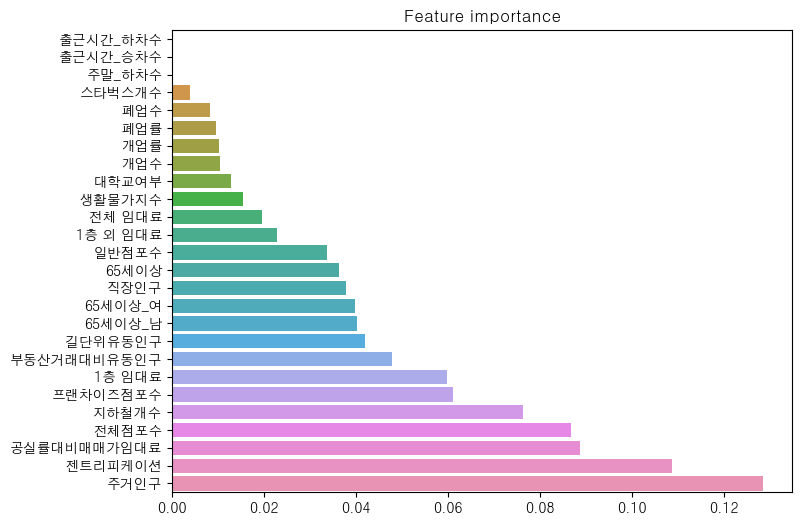

In [ ]:
#변수 중요도 확인
ser10 = pd.Series(rf10_reg.feature_importances_, index=X_train10.columns)
ser10.sort_values(inplace=True)

plt.figure(figsize=(8,6))
plt.title('Feature importance')
sns.barplot(x = ser10, y = ser10.index)
plt.show()


In [ ]:
#상관계수 & 중요도 기준으로 변수선택
X_train10_1 = X_train10.drop(columns=['출근시간_승차수', '출근시간_하차수', '65세이상_남', '65세이상_여' , '일반점포수'], axis = 1)
X_valid10_1 = X_valid10.drop(columns=['출근시간_승차수', '출근시간_하차수', '65세이상_남', '65세이상_여' , '일반점포수'], axis = 1)
X_test10_1 = X_test10.drop(columns=['출근시간_승차수', '출근시간_하차수', '65세이상_남', '65세이상_여' , '일반점포수'], axis = 1)

변수 선택 후 model

In [ ]:
rf10_1_reg = RandomForestRegressor(random_state=0)
rf10_1_reg.fit(X_train10_1, y_train10)
pred_train10_1 = rf10_1_reg.predict(X_train10_1)
pred_val10_1 = rf10_1_reg.predict(X_valid10_1)

pred_train10_1 = round(pd.DataFrame(pred_train10_1))
pred_val10_1 = round(pd.DataFrame(pred_val10_1))

print('MSE of train10_1_reg:', mean_squared_error(y_train10, pred_train10_1))
print('MSE of valid10_1_reg:', mean_squared_error(y_valid10, pred_val10_1))

MSE of train10_1_reg: 0.04631176891859633
MSE of valid10_1_reg: 0.5027624309392266


parameter tuning

In [ ]:
# RandomForestRegressor 모델 생성
reg = RandomForestRegressor(random_state=0)

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'],  # 최대 특성 개수 설정
}

# Grid Search 객체 생성
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train10_1, y_train10)

# 최적의 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델의 성능 출력
print("최적 모델의 MSE:", -grid_search.best_score_)  # 음수 MSE 값을 양수로 변환하여 출력

최적 하이퍼파라미터: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
최적 모델의 MSE: 0.36920847230615145


### [A11] Regression

In [ ]:
etr11_reg = ExtraTreesRegressor(random_state=0)
etr11_reg.fit(X_train11, y_train11)
pred_train11 = etr11_reg.predict(X_train11)
pred_val11 = etr11_reg.predict(X_valid11)

pred_train11 = round(pd.DataFrame(pred_train11))
pred_val11 = round(pd.DataFrame(pred_val11))

print('MSE of train11_reg:', mean_squared_error(y_train11, pred_train11))
print('MSE of valid11_reg:', mean_squared_error(y_valid11, pred_val11))

MSE of train11_reg: 0.004052734375
MSE of valid11_reg: 0.3853506990082447


In [ ]:
#상관계수 확인
cols = X_train11.columns
corr11 = X_train11.corr()
for i in range(len(cols)) :
  for j in range(len(cols)) :
    if i > j and corr11.iloc[i, j] > 0.9 :
      print(cols[i], cols[j], corr11.iloc[i, j])

일반점포수 전체점포수 0.9988014566227834
1층 임대료 전체 임대료 0.9325053649932055
1층 외 임대료 전체 임대료 0.9100924514499427
65세이상_남 65세이상 0.9927740581459378
65세이상_여 65세이상 0.9955715154015985
65세이상_여 65세이상_남 0.9770968363899589
주말_하차수 출근시간_승차수 0.977861062227386


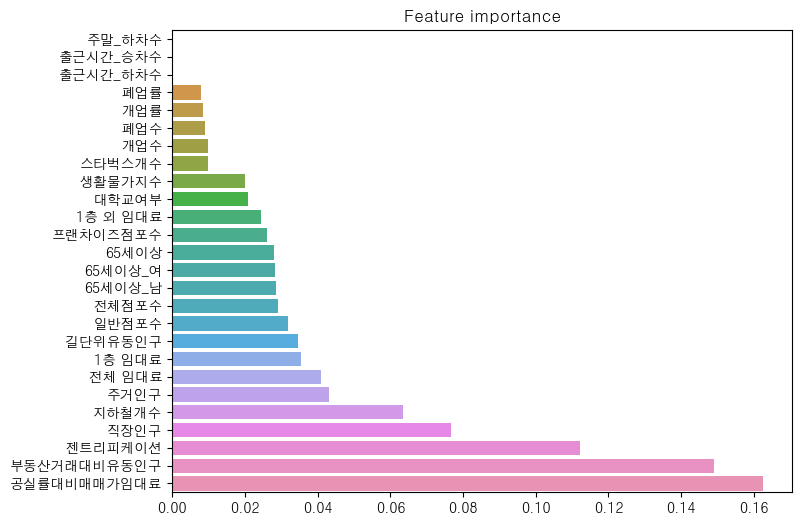

In [ ]:
#변수 중요도 확인
ser11 = pd.Series(etr11_reg.feature_importances_, index=X_train11.columns)
ser11.sort_values(inplace=True)

plt.figure(figsize=(8,6))
plt.title('Feature importance')
sns.barplot(x = ser11, y = ser11.index)
plt.show()


In [ ]:
#상관계수 & 중요도 기준으로 변수선택
X_train11_1 = X_train11.drop(columns=['65세이상_남','65세이상_여', '전체점포수'], axis = 1)
X_valid11_1 = X_valid11.drop(columns=['65세이상_남','65세이상_여', '전체점포수'], axis = 1)
X_test11_1 = X_test11.drop(columns=['65세이상_남','65세이상_여', '전체점포수'], axis = 1)

변수 선택 후 model

In [ ]:
etr11_1_reg = ExtraTreesRegressor(random_state=0)
etr11_1_reg.fit(X_train11_1, y_train11)
pred_train11_1 = etr11_1_reg.predict(X_train11_1)
pred_val11_1 = etr11_1_reg.predict(X_valid11_1)

pred_train11_1 = round(pd.DataFrame(pred_train11_1))
pred_val11_1 = round(pd.DataFrame(pred_val11_1))

print('MSE of train11_1_reg:', mean_squared_error(y_train11, pred_train11_1))
print('MSE of valid11_1_reg:', mean_squared_error(y_valid11, pred_val11_1))

MSE of train11_1_reg: 0.004052734375
MSE of valid11_1_reg: 0.3815270641653722


parameter tuning

In [ ]:
# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'],  # 최대 특성 개수 설정
}

# Grid Search 객체 생성
reg = ExtraTreesRegressor(random_state=0)
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train11_1, y_train11)

# 최적의 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델의 성능 출력
print("최적 모델의 MSE:", -grid_search.best_score_)  # 음수 MSE 값을 양수로 변환하여 출력

최적 하이퍼파라미터: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
최적 모델의 MSE: 0.37152510918511283


### test 매출등급 예측

In [ ]:
# 테스트 데이터 예측
pred_test8 = etr8_1_reg.predict(X_test8_1)
pred_test8_round = round(pd.DataFrame(pred_test8))

# 제출 형식으로 바꾸기
pred_test_a08 = pd.concat([test8[['DATA_CRTR_YM', 'LT_UNQ_NO', 'INDUSTRY_CD', 'STDG_EMD_CD']].reset_index(drop=True), pred_test8_round], axis=1)
pred_test_a08.rename(columns={0:'SLS_GRD'}, inplace=True)

pred_test_a08_202301 = pred_test_a08[pred_test_a08['DATA_CRTR_YM']==202301]
pred_test_a08_202302 = pred_test_a08[pred_test_a08['DATA_CRTR_YM']==202302]
pred_test_a08_202301 = pred_test_a08_202301.sort_values(by='LT_UNQ_NO').reset_index(drop=True)
pred_test_a08_202302 = pred_test_a08_202302.sort_values(by='LT_UNQ_NO').reset_index(drop=True)

pred_test_a08_202301.rename(columns={'SLS_GRD':'SLS_GRD_2301'}, inplace=True)
pred_test_a08_202302.rename(columns={'SLS_GRD':'SLS_GRD_2302'}, inplace=True)

pred_test_a08_202301['SLS_GRD_2302'] = pred_test_a08_202302['SLS_GRD_2302']
pred_test_a08 = pred_test_a08_202301
pred_test_a08.drop(columns='DATA_CRTR_YM', axis=1, inplace=True)
pred_test_a08.head()

,LT_UNQ_NO,INDUSTRY_CD,STDG_EMD_CD,SLS_GRD_2301,SLS_GRD_2302
0,1111011000101750003,A08,11110110,3.0,3.0
1,1111011700100050000,A08,11110117,3.0,3.0
2,1111011800101100034,A08,11110118,3.0,3.0
3,1111012200102010001,A08,11110122,3.0,3.0
4,1111012300101290001,A08,11110123,2.0,2.0


In [ ]:
# 테스트 데이터 예측
pred_test9 = etr9_1_reg.predict(X_test9_1)
pred_test9_round = round(pd.DataFrame(pred_test9))

# 제출 형식으로 바꾸기
pred_test_a09 = pd.concat([test9[['DATA_CRTR_YM', 'LT_UNQ_NO', 'INDUSTRY_CD', 'STDG_EMD_CD']].reset_index(drop=True), pred_test9_round], axis=1)
pred_test_a09.rename(columns={0:'SLS_GRD'}, inplace=True)

pred_test_a09_202301 = pred_test_a09[pred_test_a09['DATA_CRTR_YM']==202301]
pred_test_a09_202302 = pred_test_a09[pred_test_a09['DATA_CRTR_YM']==202302]
pred_test_a09_202301 = pred_test_a09_202301.sort_values(by='LT_UNQ_NO').reset_index(drop=True)
pred_test_a09_202302 = pred_test_a09_202302.sort_values(by='LT_UNQ_NO').reset_index(drop=True)

pred_test_a09_202301.rename(columns={'SLS_GRD':'SLS_GRD_2301'}, inplace=True)
pred_test_a09_202302.rename(columns={'SLS_GRD':'SLS_GRD_2302'}, inplace=True)

pred_test_a09_202301['SLS_GRD_2302'] = pred_test_a09_202302['SLS_GRD_2302']
pred_test_a09 = pred_test_a09_202301
pred_test_a09.drop(columns='DATA_CRTR_YM', axis=1, inplace=True)
pred_test_a09.head()

,LT_UNQ_NO,INDUSTRY_CD,STDG_EMD_CD,SLS_GRD_2301,SLS_GRD_2302
0,1111016800100010052,A09,11110168,2.0,2.0
1,1114016300101580009,A09,11140163,3.0,3.0
2,1117010100100600038,A09,11170101,4.0,4.0
3,1120010700100060002,A09,11200107,2.0,2.0
4,1120010700103090001,A09,11200107,3.0,3.0


In [ ]:
# 테스트 데이터 예측
pred_test10 = rf10_1_reg.predict(X_test10_1)
pred_test10_round = round(pd.DataFrame(pred_test10))

# 제출 형식으로 바꾸기
pred_test_a10 = pd.concat([test10[['DATA_CRTR_YM', 'LT_UNQ_NO', 'INDUSTRY_CD', 'STDG_EMD_CD']].reset_index(drop=True), pred_test10_round], axis=1)
pred_test_a10.rename(columns={0:'SLS_GRD'}, inplace=True)

pred_test_a10_202301 = pred_test_a10[pred_test_a10['DATA_CRTR_YM']==202301]
pred_test_a10_202302 = pred_test_a10[pred_test_a10['DATA_CRTR_YM']==202302]
pred_test_a10_202301 = pred_test_a10_202301.sort_values(by='LT_UNQ_NO').reset_index(drop=True)
pred_test_a10_202302 = pred_test_a10_202302.sort_values(by='LT_UNQ_NO').reset_index(drop=True)

pred_test_a10_202301.rename(columns={'SLS_GRD':'SLS_GRD_2301'}, inplace=True)
pred_test_a10_202302.rename(columns={'SLS_GRD':'SLS_GRD_2302'}, inplace=True)

pred_test_a10_202301['SLS_GRD_2302'] = pred_test_a10_202302['SLS_GRD_2302']
pred_test_a10 = pred_test_a10_202301
pred_test_a10.drop(columns='DATA_CRTR_YM', axis=1, inplace=True)
pred_test_a10.head()

,LT_UNQ_NO,INDUSTRY_CD,STDG_EMD_CD,SLS_GRD_2301,SLS_GRD_2302
0,1111011800100730000,A10,11110118,2.0,2.0
1,1111017100100200001,A10,11110171,3.0,3.0
2,1111017400106870004,A10,11110174,4.0,4.0
3,1114016200104320716,A10,11140162,4.0,4.0
4,1120011200112060000,A10,11200112,3.0,3.0


In [ ]:
# 테스트 데이터 예측
pred_test11 = etr11_1_reg.predict(X_test11_1)
pred_test11_round = round(pd.DataFrame(pred_test11))

# 제출 형식으로 바꾸기
pred_test_a11 = pd.concat([test11[['DATA_CRTR_YM', 'LT_UNQ_NO', 'INDUSTRY_CD', 'STDG_EMD_CD']].reset_index(drop=True), pred_test11_round], axis=1)
pred_test_a11.rename(columns={0:'SLS_GRD'}, inplace=True)

pred_test_a11_202301 = pred_test_a11[pred_test_a11['DATA_CRTR_YM']==202301]
pred_test_a11_202302 = pred_test_a11[pred_test_a11['DATA_CRTR_YM']==202302]
pred_test_a11_202301 = pred_test_a11_202301.sort_values(by='LT_UNQ_NO').reset_index(drop=True)
pred_test_a11_202302 = pred_test_a11_202302.sort_values(by='LT_UNQ_NO').reset_index(drop=True)

pred_test_a11_202301.rename(columns={'SLS_GRD':'SLS_GRD_2301'}, inplace=True)
pred_test_a11_202302.rename(columns={'SLS_GRD':'SLS_GRD_2302'}, inplace=True)

pred_test_a11_202301['SLS_GRD_2302'] = pred_test_a11_202302['SLS_GRD_2302']
pred_test_a11 = pred_test_a11_202301
pred_test_a11.drop(columns='DATA_CRTR_YM', axis=1, inplace=True)
pred_test_a11.head()

,LT_UNQ_NO,INDUSTRY_CD,STDG_EMD_CD,SLS_GRD_2301,SLS_GRD_2302
0,1111011700101280027,A11,11110117,2.0,2.0
1,1111011800101100039,A11,11110118,2.0,2.0
2,1111012100100920000,A11,11110121,2.0,2.0
3,1111012200100110003,A11,11110122,2.0,2.0
4,1111012400100850000,A11,11110124,2.0,2.0


In [ ]:
pred_test_a891011=pd.concat([pred_test_a08,pred_test_a09,pred_test_a10,pred_test_a11])

In [ ]:
pred_test_a891011

,LT_UNQ_NO,INDUSTRY_CD,STDG_EMD_CD,SLS_GRD_2301,SLS_GRD_2302
0,1111011000101750003,A08,11110110,3.0,3.0
1,1111011700100050000,A08,11110117,3.0,3.0
2,1111011800101100034,A08,11110118,3.0,3.0
3,1111012200102010001,A08,11110122,3.0,3.0
4,1111012300101290001,A08,11110123,2.0,2.0
...,...,...,...,...,...
438,1174010900100450002,A11,11740109,4.0,4.0
439,1174010900102370003,A11,11740109,4.0,3.0
440,1174010900102970002,A11,11740109,3.0,3.0
441,1174010900103250006,A11,11740109,4.0,4.0
